In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

['incendo-hackthon', 'glove-840b-300d']


In [2]:
train = pd.read_csv('../input/incendo-hackthon/train_dataset.csv')
test = pd.read_csv('../input/incendo-hackthon/test_dataset.csv')

In [3]:
train.head(10)

,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
0,1,1.0,0,3,1,1,1.0,1.0,1.0,average,worst,Some additional information that we would need...
1,2,1.0,0,3,1,1,NaN,1.5,1.0,excellent,worst,"After reading the expirement, I realized that ..."
2,3,1.0,0,3,1,1,1.0,1.0,1.5,worst,above_average,"What you need is more trials, a control set up..."
3,4,1.0,0,3,0,0,0.0,0.0,1.0,worst,worst,The student should list what rock is better an...
4,5,1.0,0,3,2,2,2.0,2.5,1.0,above_average,worst,For the students to be able to make a replicat...
5,6,1.0,0,3,1,0,0.0,0.0,0.0,worst,worst,I would need the information of why you would ...
6,7,1.0,0,3,1,0,0.0,0.5,0.0,average,worst,The information I would need in order to suces...
7,8,1.0,0,3,3,3,2.0,3.0,3.0,above_average,above_average,You would need many more pieces of information...
8,9,1.0,0,3,3,3,3.0,3.0,3.0,above_average,above_average,Some additional information you will need are ...
9,10,1.0,0,3,2,2,2.5,1.5,2.5,excellent,average,"Inorder to replicate the experiment, we will n..."


In [4]:
train.iloc[394]['EssayText']

'In order to replicate this experiment the type or sample would need to be indicated in the procedure in addition the size of the containers would need to be used. Also the amount of material placed into each containers would need to be indicated.Lastly, the amount of vinegar added into the container should be included.'

In [5]:
train.shape

(17043, 12)

In [6]:
train.dtypes

ID             int64
Essayset     float64
min_score      int64
max_score      int64
score_1        int64
score_2        int64
score_3      float64
score_4      float64
score_5      float64
clarity       object
coherent      object
EssayText     object
dtype: object

In [7]:
train.isna().sum()

ID             0
Essayset     157
min_score      0
max_score      0
score_1        0
score_2        0
score_3      147
score_4      136
score_5      144
clarity      138
coherent     145
EssayText      0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

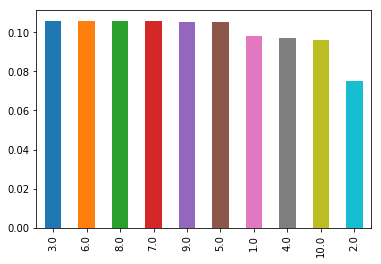

In [9]:
train['Essayset'].value_counts(normalize=True).plot.bar()

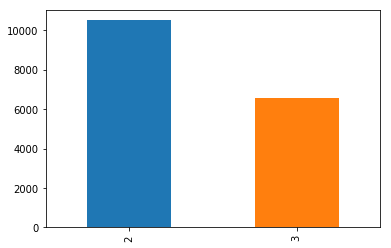

In [10]:
train['max_score'].value_counts().plot.bar()

Let's try to impute the missing values for each of the columns

In [11]:
train.loc[train['Essayset'].isna()==True]

,ID,Essayset,min_score,max_score,score_1,score_2,score_3,score_4,score_5,clarity,coherent,EssayText
283,284,NaN,0,3,1,0,0.0,0.0,0.0,average,worst,First I would add that the students might want...
394,395,NaN,0,3,3,3,3.0,3.0,3.0,above_average,above_average,In order to replicate this experiment the type...
445,446,NaN,0,3,2,2,2.0,2.0,2.0,above_average,excellent,"In order to replicate the experiment , the gro..."
635,636,NaN,0,3,1,1,1.0,0.5,1.0,average,worst,"To be able to replicate the expariment, you wo..."
693,694,NaN,0,3,2,0,0.0,0.5,0.0,average,worst,You have to make sure that you are very specif...
898,899,NaN,0,3,0,0,0.0,0.0,0.0,worst,worst,Well first thing they do was they determine th...
921,922,NaN,0,3,3,3,3.0,2.0,3.0,excellent,above_average,Some additional information that would need in...
1039,1040,NaN,0,3,1,1,1.0,0.5,1.5,worst,average,How much vinegar should they put on each conta...
1128,1129,NaN,0,3,2,2,1.0,2.5,2.0,excellent,average,I would need to know how much vinegar I was po...
1130,1131,NaN,0,3,1,1,1.0,0.5,1.5,average,above_average,To replicate this experiment I would need to k...


One good way to impute the missing value of this column is to take the advantage of the fact that essay set {1,2,5,6}
has the max value of 10 and rest have the max value of 2.

So if the max score for the row is 3, I'll be imputing the set with the highest mode in {1,2,5,6} else with the mode of remaning value

In [12]:
X = train.copy()
X_test = test.copy()

In [13]:
from collections import defaultdict

def count_value(df):
        dic = defaultdict(int)
        dic1 = defaultdict(int)
        df = df.dropna()
        for val in df['Essayset']:
            if val in [1.0,2.0,5.0,6.0]:
                dic[val]+=1
            else:
                dic1[val]+=1
        return dic,dic1

In [14]:
count_value(X)

(defaultdict(int, {1.0: 1603, 2.0: 1225, 5.0: 1693, 6.0: 1703}),
 defaultdict(int,
             {3.0: 1714,
              4.0: 1568,
              7.0: 1710,
              8.0: 1715,
              9.0: 1704,
              10.0: 1541}))

So if the value of Eassayset is missing and the max marks for the row is 3 we will be imputing the value of 6.0 and if the max marks is 2 we will impute 8.0

In [15]:
X.loc[(X['Essayset'].isna() == True) & (X['max_score'] == 3),['Essayset']] = 6.0
X.loc[(X['Essayset'].isna() == True) & (X['max_score'] == 2),['Essayset']] = 8.0

In [16]:
import seaborn as sns


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


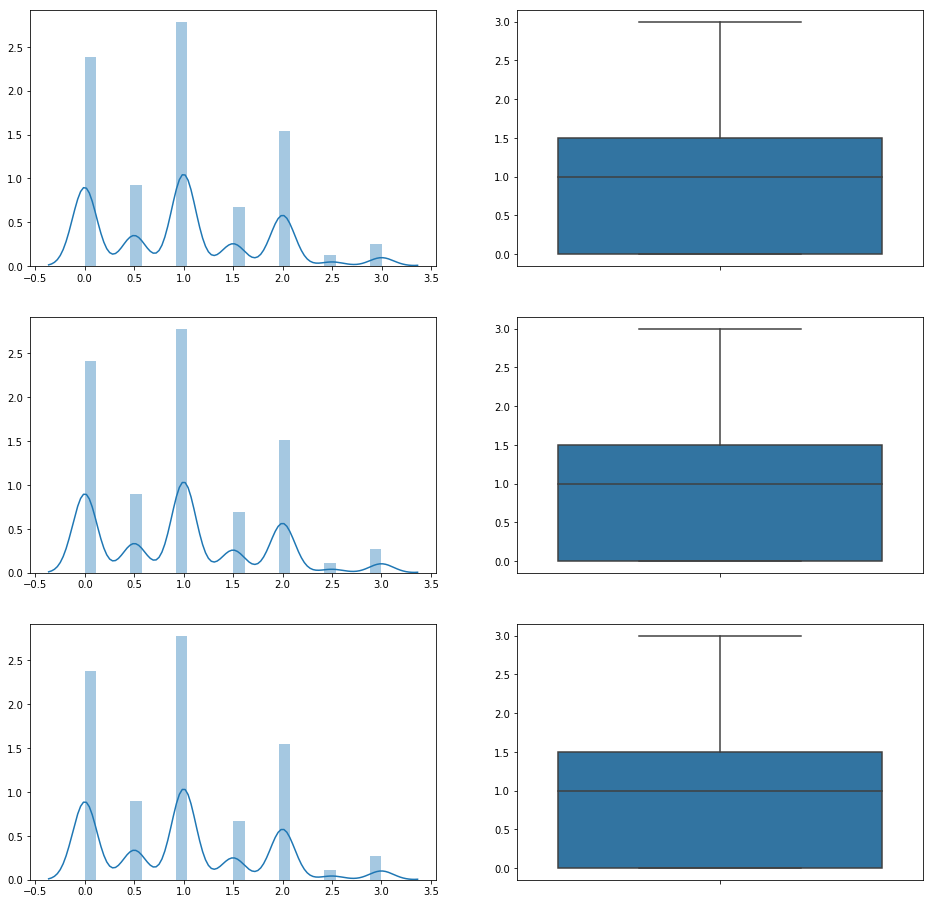

In [17]:
plt.figure(1,figsize=(16,16))


plt.subplot(321)
sns.distplot(X.loc[X['score_3'].isna()!=True,['score_3']])
plt.subplot(322)
sns.boxplot(y=X.loc[X['score_3'].isna()!=True,['score_3']])

plt.subplot(323)
sns.distplot(X.loc[X['score_4'].isna()!=True,['score_4']])
plt.subplot(324)
sns.boxplot(y=X.loc[X['score_4'].isna()!=True,['score_4']])

plt.subplot(325)
sns.distplot(X.loc[X['score_5'].isna()!=True,['score_5']])
plt.subplot(326)
sns.boxplot(y=X.loc[X['score_5'].isna()!=True,['score_5']])

plt.show()

We will be imputying the scores with the mean of their corresponding columns.

In [18]:
X.loc[X['score_3'].isna()==True,['score_3']] = X['score_3'].mean()
X.loc[X['score_4'].isna()==True,['score_4']] = X['score_4'].mean()
X.loc[X['score_5'].isna()==True,['score_5']] = X['score_4'].mean()

In [19]:
X.isna().sum()

ID             0
Essayset       0
min_score      0
max_score      0
score_1        0
score_2        0
score_3        0
score_4        0
score_5        0
clarity      138
coherent     145
EssayText      0
dtype: int64

Computing the average of score_1...score_5

In [20]:
X['score'] = X.loc[:,['score_1','score_2','score_3','score_4','score_5']].mean(axis=1)

In [21]:
X = X.drop(labels = ['score_1','score_2','score_3','score_4','score_5'],axis =1)


In [22]:
X['score'] = X['score'].round()
X.head()

,ID,Essayset,min_score,max_score,clarity,coherent,EssayText,score
0,1,1.0,0,3,average,worst,Some additional information that we would need...,1.0
1,2,1.0,0,3,excellent,worst,"After reading the expirement, I realized that ...",1.0
2,3,1.0,0,3,worst,above_average,"What you need is more trials, a control set up...",1.0
3,4,1.0,0,3,worst,worst,The student should list what rock is better an...,0.0
4,5,1.0,0,3,above_average,worst,For the students to be able to make a replicat...,2.0


In [23]:
X['score'] = X['score'].astype('category')

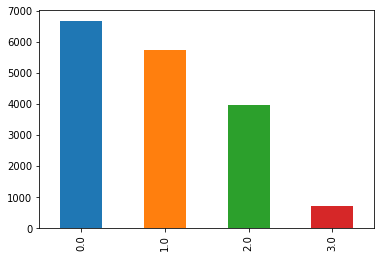

In [24]:
X['score'].value_counts().plot.bar()

We can see that the distribution is skwed

Since there are two different kinds of score scale present one with max marks 3 and other with max marks 2 we will first have to normalize those.

Also we will revert the normalization when predicting the scores

Now let's proceed ahead with text processing

In [25]:
df = pd.concat([X,X_test],sort=True)

In [26]:
df.shape

(22267, 8)

Building vocabulary

In [27]:
from collections import defaultdict
# def build_vocab(df):
#         dic = defaultdict(int)
#         sentences = df['EssayText'].values
#         for sentence in sentences:
#             for word in sentence.split():
#                 dic[word] +=1
#         return dic

def build_vocab(sentences):
        dic = defaultdict(int)
        for sentence in sentences:
            for word in sentence:
                dic[word] +=1
        return dic


In [28]:
sentences = df['EssayText'].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)

In [29]:
len(vocab)

34995

Loading Embedding

In [30]:
def load_embed(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
        
    return embeddings_index

In [31]:
embedding = load_embed('../input/glove-840b-300d/glove.840B.300d.txt')

Let's check how many words in our  vocab is present in the embedding

In [32]:
def embed_intersection(vocab,embedding):
    temp = {}
    oov = {}
    i = 0
    j = 0
    
    for word in vocab.keys():
        try:
            temp[word] = embedding[word]
            i+=vocab[word]
        except:
            oov[word] = vocab[word]
            j+=vocab[word]
            pass
    
    print(f"Found embeddings for {(len(temp)/len(vocab)*100):.3f}% of vocab")
    print(f"Found embeddings for {(i/(i+j))*100:.3f}% of all text")
    
    sorted_x = sorted(oov.items(),key = lambda x: x[1])[::-1]
    return sorted_x

In [33]:
oov = embed_intersection(vocab,embedding)

Found embeddings for 45.321% of vocab
Found embeddings for 92.459% of all text


In [34]:
oov[:10]

[('::', 2186),
 ('^p', 885),
 ('"invasive"', 575),
 ('experiment,', 522),
 ('membrane.', 429),
 ('Also,', 412),
 ("Australia's", 352),
 ("Leonard's", 335),
 ('Leonard.', 322),
 ("China's", 320)]

We can see the top OOV words are either special chars or words with special chars also presence of capital letter in word is making them OOV from embedding, we will be dealing with all of the cases

In [35]:
df['lower'] = df['EssayText'].apply(lambda x: x.lower())

But lowercasing all the words may cause some information loss, as there are some words whose embedding is present only in capital letters

We can fix this:

* word.lower() takes the embedding of word if word.lower() doesn't have an embedding


In [36]:
def fix_case(embedding,vocab):
    count = 0
    for word in vocab:
        if word in embedding and word.lower() not in embedding:
            embedding[word.lower()] = embedding[word]
            count +=1
    print(f'{count} no of words inserted into embedding')

In [37]:
oov = embed_intersection(vocab,embedding)
fix_case(embedding,vocab)
oov = embed_intersection(vocab,embedding)

Found embeddings for 45.321% of vocab
Found embeddings for 92.459% of all text
252 no of words inserted into embedding
Found embeddings for 45.395% of vocab
Found embeddings for 92.466% of all text


In [38]:
oov[:10]

[('::', 2186),
 ('^p', 885),
 ('"invasive"', 575),
 ('experiment,', 522),
 ('membrane.', 429),
 ('Also,', 412),
 ("Australia's", 352),
 ("Leonard's", 335),
 ('Leonard.', 322),
 ("China's", 320)]

We can see that the punctuations and contractions are causing the mismatch between our vocab and embeddings

In [39]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                       "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not",
                       "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                       "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                       "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                       "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                       "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                       "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                       "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                       "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                       "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
                       "there's": "there is", "here's": "here is","they'd": "they would", 
                       "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": 
                       "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                       "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", 
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", 
                       "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", 
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", 
                       "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                       "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                       "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
                       "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [40]:
def cont_map(embedding):
    known = []
    for cont in contraction_mapping:
        if cont in embedding:
            known.append(cont)
    return known

In [41]:
cont_map(embedding)

["can't",
 "'cause",
 "didn't",
 "doesn't",
 "don't",
 "I'd",
 "I'll",
 "I'm",
 "I've",
 "i'd",
 "i'll",
 "i'm",
 "i've",
 "it's",
 "ma'am",
 "o'clock",
 "that's",
 "you'll",
 "you're"]

Not all contractions are present  in the embeddings, we will now be replacing them

In [42]:
def fix_cont(sentence,mapping):
    sentence = str(sentence)
    specials = ["’", "‘", "´", "`"]
    for each in specials:
        sentence = sentence.replace(each,"'")
    sentence = " ".join([mapping[word] if word in mapping else word for word in sentence.split(" ")])
    return sentence

In [43]:
df['fixed'] = df['lower'].apply(lambda x: fix_cont(x,contraction_mapping))

In [44]:
sentences = df['fixed'].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
oov = embed_intersection(vocab,embedding)

Found embeddings for 43.798% of vocab
Found embeddings for 92.774% of all text


In [45]:
oov[:10]

[('::', 2186),
 ('^p', 1017),
 ('"invasive"', 640),
 ('experiment,', 522),
 ('also,', 439),
 ('membrane.', 431),
 ('a)', 412),
 ('b)', 394),
 ('mr.leonard', 361),
 ("australia's", 354)]

In [46]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'

def unknown_punct(embed, punct):
    unknown = []
    for p in punct:
        if p not in embed:
            unknown.append(p)
    return unknown

print('Unknown Puctuations')
print(unknown_punct(embedding,punct))

Unknown Puctuations
['“', '”', '’', '∞', 'θ', '÷', 'α', '•', 'à', '−', 'β', '∅', '³', 'π', '‘', '₹', '´', '°', '£', '€', '×', '™', '√', '²', '—', '–']


In [47]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ",
                 "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", 
                 '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 
                 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

def fix_punt(sentence,punct,mapping):
    for p in mapping:
        sentence = sentence.replace(p, mapping[p])
    
    for p in punct:
        sentence = sentence.replace(p, f' {p} ')
        
    return sentence

In [48]:
df['fixed'] = df['fixed'].apply(lambda x: fix_punt(x,punct,punct_mapping))

sentences = df['fixed'].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
oov = embed_intersection(vocab,embedding)

Found embeddings for 69.915% of vocab
Found embeddings for 99.312% of all text


Wo!!! we have found the embeddings for 99.3% of all the words in our vocab,

let's check some top OOV words

In [49]:
oov[:50]

[('microdebris', 66),
 ('grna', 52),
 ('telephase', 35),
 ('nucleus2', 29),
 ('nuclues', 25),
 ('permiable', 20),
 ('doghou', 19),
 ('dogho', 18),
 ('mitocondria', 18),
 ('meosis', 17),
 ('nucleas', 17),
 ('doghous', 15),
 ('leaonard', 15),
 ('trna2', 15),
 ('ghouse', 14),
 ('nucles', 14),
 ('inasive', 14),
 ('strechability', 14),
 ('nucleaus', 13),
 ('phythons', 13),
 ('fluncked', 12),
 ('robray', 12),
 ('phython', 12),
 ('expirament', 12),
 ('dogh', 11),
 ('loenard', 11),
 ('memebrane', 11),
 ('trna3', 11),
 ('mperature', 10),
 ('satelittes', 10),
 ('treh', 10),
 ('ribsomes', 10),
 ('organells', 10),
 ('telaphase', 10),
 ('mebrane', 10),
 ('satillites', 9),
 ('orginizes', 9),
 ('obsorbs', 9),
 ('membrane2', 9),
 ('diffussion', 9),
 ('membrane3', 9),
 ('ooler', 8),
 ('oghouse', 8),
 ('permiability', 8),
 ('cillia', 8),
 ('mrna3', 8),
 ('ribosome2', 8),
 ('resperation', 8),
 ('dna3', 8),
 ('nuclus', 8)]

What's still missing ?

* Unknown words
* Acronyms
* Spelling mistake
Now we will fix some of the common mispellings and acronyms to further improve our intersection of vocab with embeddings

In [50]:
mispell_dict = {"grna": "RNA", "telephase":"telophase","nucleus2":"nucleus",
               "nuclues":"nucleus","permiable":"permeable","mitocondria":"mitochondria",
                "meosis": "meiosis","nucleas":"nucleus","trna2":"RNA","nucles":"nucleus",
                "inasive":"invasive","strechability":"stretchability","nucleaus":"nucleus",
                "phythons":'pythons',"phython":"python","fluncked":"flunked",
                "expirament":"experiment","memebrane":"membrane","trna3":"RNA",
                "mperature":"temprature","satelittes":"satellites","orginizes":"organizes",
                "obsorbs":"absorbs","membrane2":"membrane","membrane3":"membrane",
                "diffussion":"diffusion","permiability":"permeability","cillia":"cilia",
                "mrna3":"RNA","ribosome2":"ribosome","resperation":"respiration",
                "dna3":"DNA","nuclus":"nucleus","trna2":"RNA","nucles":"nucleus",
                "meosis":"meiosis","nucleas":"nucleus"
               }

In [51]:
def fix_spelling(sentence,mapping):
    for word in mapping.keys():
        sentence = sentence.replace(word,mapping[word])
    return sentence

In [52]:
df['fixed'] = df['fixed'].apply(lambda x: fix_spelling(x,mispell_dict))

sentences = df['fixed'].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
oov = embed_intersection(vocab,embedding)

Found embeddings for 70.061% of vocab
Found embeddings for 99.249% of all text


It's time to build the model

Applying all the changes to test and train set

In [53]:
X.head()

,ID,Essayset,min_score,max_score,clarity,coherent,EssayText,score
0,1,1.0,0,3,average,worst,Some additional information that we would need...,1.0
1,2,1.0,0,3,excellent,worst,"After reading the expirement, I realized that ...",1.0
2,3,1.0,0,3,worst,above_average,"What you need is more trials, a control set up...",1.0
3,4,1.0,0,3,worst,worst,The student should list what rock is better an...,0.0
4,5,1.0,0,3,above_average,worst,For the students to be able to make a replicat...,2.0


In [54]:
X['fixed'] = X['EssayText'].apply(lambda x: x.lower())
X['fixed'] = X['fixed'].apply(lambda x: fix_cont(x,contraction_mapping))
X['fixed'] = X['fixed'].apply(lambda x: fix_punt(x,punct,punct_mapping))

X_copy = X.copy()

X['fixed'] = X['fixed'].apply(lambda x: fix_spelling(x,mispell_dict))


X_test['fixed'] = X_test['EssayText'].apply(lambda x: x.lower())
X_test['fixed'] = X_test['fixed'].apply(lambda x: fix_cont(x,contraction_mapping))
X_test['fixed'] = X_test['fixed'].apply(lambda x: fix_punt(x,punct,punct_mapping))
X_test['fixed'] = X_test['fixed'].apply(lambda x: fix_spelling(x,mispell_dict))

In [55]:
del df

In [56]:
vocab_size = len(vocab) + 1
max_len = 50

In [57]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [58]:
def process_text(data):
    t = Tokenizer(filters='')
    t.fit_on_texts(data)
    data = t.texts_to_sequences(data)
    data = pad_sequences(data,maxlen=max_len)
    return data,t.word_index,t

In [59]:
X_processed,word_index,tokenizer = process_text(X['fixed'])

In [60]:
X_processed.shape

(17043, 50)

In [61]:
X_processed[0]

array([153,   1,  59,   6,  20,  75, 105,  89,  18, 798,   7,  79, 862,
       215,   4,  20,  68,  26, 841,   3, 124,   3, 508,   1, 159,   9,
         1, 205,  63, 118,   5,  20,  75, 623, 231,   3, 124,   3, 603,
         1, 205, 118, 122, 573, 123,  58,   9,   1, 105,   2], dtype=int32)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from keras.utils import to_categorical
y = X['score']
y = to_categorical(y)

In [64]:
X_train,X_val,y_train,y_val = train_test_split(X_processed,y,test_size=0.25,random_state=42)

Let's build our embedding matrix now

In [65]:
def make_embed_matrix(embedding,word_index,vocab_size):
    embds = np.stack(embedding.values())
    embd_mean,embd_std = embds.mean(),embds.std()
    embed_size = embds.shape[1]
    word_index = word_index
    embedding_matrix = np.random.normal(embd_mean,embd_std,(vocab_size,embed_size))
    
    for word,i in word_index.items():
        if i>=vocab_size:
            continue
        embedding_vec = embedding.get(word)
        if embedding_vec is not None:
            embedding_matrix[i] = embedding_vec
    return embedding_matrix
            

In [66]:
import gc
embed_matrix = make_embed_matrix(embedding,word_index,vocab_size)
del word_index
gc.collect()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


10

In [67]:
embed_matrix.shape

(18779, 300)

In [68]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [69]:
from keras.layers import Dense, Embedding, CuDNNGRU, Bidirectional, GlobalAveragePooling1D
from keras.layers import GlobalMaxPooling1D,concatenate,Input, Dropout
from keras.optimizers import Adam
from keras.models import Model

In [70]:
def make_model(embed_matrix,embed_size=300,loss='categorical_crossentropy'):
    inp = Input(shape=(max_len,))
    x = Embedding(input_dim=vocab_size,output_dim=embed_size,weights=[embed_matrix],trainable=False)(inp)
    x = Bidirectional(CuDNNGRU(128,return_sequences=True))(x)
    avg_pl = GlobalAveragePooling1D()(x)
    max_pl = GlobalMaxPooling1D()(x)
    concat = concatenate([avg_pl,max_pl])
    dense = Dense(128,activation='relu')(concat)
    dense = Dropout(rate = 0.7)(dense)
    output = Dense(4,activation='sigmoid')(dense)
    
    model = Model(input=inp,output=output)
    model.compile(loss=loss,optimizer=Adam(lr=0.0001),metrics=['accuracy', f1])
    return model

In [71]:
model = make_model(embed_matrix)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


In [72]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 300)      5633700     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 50, 256)      330240      embedding_1[0][0]                
__________________________________________________________________________________________________
global_average_pooling1d_1 (Glo (None, 256)          0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
global_max

In [73]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [74]:
checkpoints = ModelCheckpoint('model.h5',monitor='val_f1',mode='max',save_best_only='True',verbose=True)
reduce_lr = ReduceLROnPlateau(monitor='val_f1', factor=0.1, patience=2, verbose=1, min_lr=0.000001)

In [75]:
epochs = 100
batch_size = 64

In [76]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
                    validation_data=[X_val, y_val], callbacks=[checkpoints, reduce_lr])

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 12782 samples, validate on 4261 samples
Epoch 1/100
12782/12782 [==============================] - 5s 426us/step - loss: 1.1052 - acc: 0.4881 - f1: 0.5282 - val_loss: 1.0013 - val_acc: 0.5454 - val_f1: 0.5669

Epoch 00001: val_f1 improved from -inf to 0.56687, saving model to model.h5
Epoch 2/100
12782/12782 [==============================] - 2s 165us/step - loss: 1.0264 - acc: 0.5395 - f1: 0.5499 - val_loss: 0.9431 - val_acc: 0.5816 - val_f1: 0.5964

Epoch 00002: val_f1 improved from 0.56687 to 0.59635, saving model to model.h5
Epoch 3/100
12782/12782 [==============================] - 2s 163us/step - loss: 0.9810 - acc: 0.5689 - f1: 0.5542 - val_loss: 0.9017 - val_acc: 0.6050 - val_f1: 0.6113

Epoch 00003: val_f1 improved from 0.59635 to 0.61134, saving model to model.h5

Epoch 00003: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.


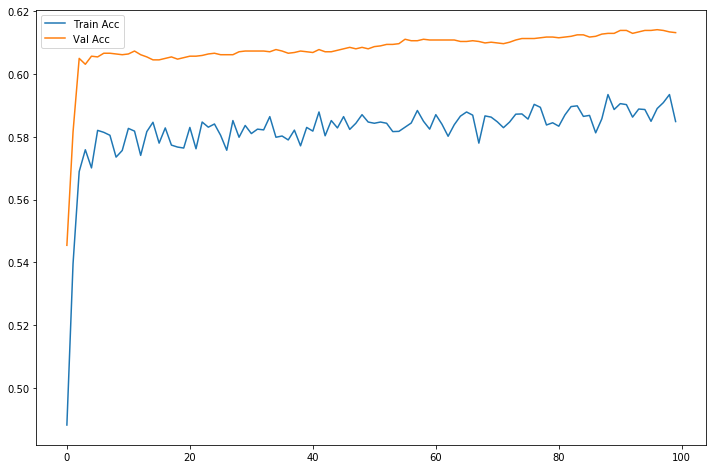

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend(('Train Acc', 'Val Acc'))
plt.show()

In [78]:
model.load_weights('model.h5')

In [79]:
submission = tokenizer.texts_to_sequences(X_test['fixed'])
submission = pad_sequences(submission,maxlen=max_len)

In [80]:
pred_sub = model.predict(submission,batch_size=512,verbose=1)

pred_sub = np.argmax(pred_sub,axis=1)

5224/5224 [==============================] - 0s 45us/step


In [81]:
X_test['essay_score'] = pred_sub

In [82]:
X_test.head()

,ID,Essayset,min_score,max_score,clarity,coherent,EssayText,fixed,essay_score
0,1673,1,0,3,average,worst,The procedures I think they should have includ...,the procedures i think they should have includ...,0
1,1674,1,0,3,average,worst,"In order to replicate this experiment, you wou...","in order to replicate this experiment , you w...",2
2,1675,1,0,3,above_average,above_average,"In order to replicate their experiment, you wo...","in order to replicate their experiment , you ...",2
3,1676,1,0,3,worst,worst,Pleace a simple of one material into one conta...,pleace a simple of one material into one conta...,0
4,1677,1,0,3,worst,worst,Determin the mass of four different samples ma...,determin the mass of four different samples ma...,1


In [83]:
sub = X_test.drop(labels=['min_score','max_score','clarity','coherent','EssayText','fixed'],axis=1)

In [84]:
sub.columns = ['id','essay_set', 'essay_score']

sub.head()

,id,essay_set,essay_score
0,1673,1,0
1,1674,1,2
2,1675,1,2
3,1676,1,0
4,1677,1,1


In [85]:
sub.to_csv(path_or_buf = 'submission.csv',index=False)